In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
from pathlib import Path
from keras.utils import load_img
from keras.models import load_model
from IPython.display import display
from PIL import Image as PILImage

from google.colab import drive
drive.mount('/content/drive')

!pip3 install keras_unet_collection
from keras_unet_collection import models
model = models.unet_2d(input_size=(256,256,3), filter_num=[64, 128, 256, 512], n_labels=1, activation="GELU", output_activation="Sigmoid")
weight_path = "/content/drive/My Drive/COMP4211Project/UNet_best.h5"
model.load_weights(weight_path)

input_dir = "/content/drive/My Drive/UROP/input"
input_ext = ".png"
img_size = (256, 256)
input_band_count = 3
input_img_paths = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(input_ext)
    ]
)
test_index = slice(int(0.9*len(os.listdir(input_dir))), None)
test_input_img_paths = input_img_paths[test_index]


Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 2.6 MB/s eta 0:00:00


19/19 [==============================] - 43s 1s/step


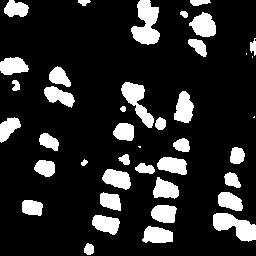

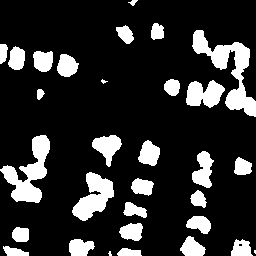

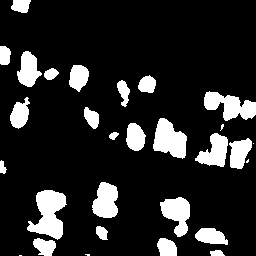

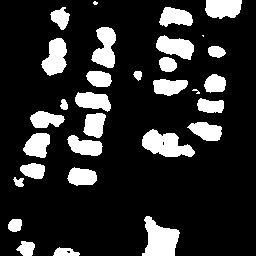

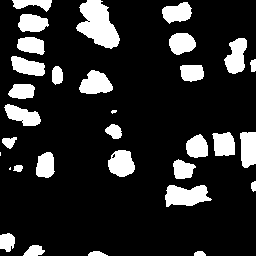

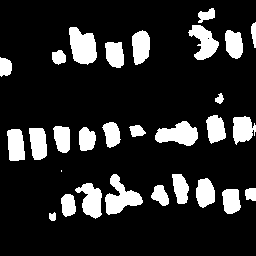

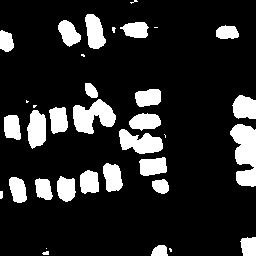

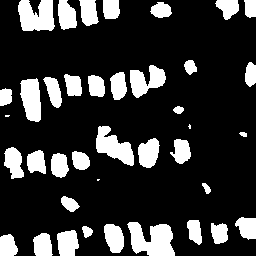

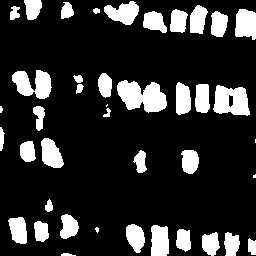

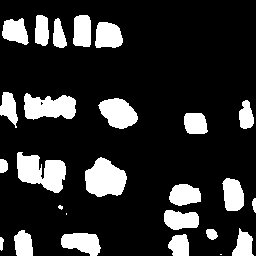

In [3]:
x = np.zeros((len(test_input_img_paths),) + img_size + (input_band_count,), dtype="float32")

pred_dir = "/content/drive/My Drive/COMP4211Project/prediction"
for i, path in enumerate(test_input_img_paths):
    img = load_img(path, target_size = img_size)
    x[i] = img
    x[i] = x[i] / 255

y = model.predict(x)
y = (np.array(y) > 0.5).astype(np.uint8)
y = y * 255

for i, path in enumerate(test_input_img_paths):
    pred = PILImage.fromarray(y[i, : , : , 0])
    pred_path = os.path.join(pred_dir, os.path.basename(path))
    pred.save(pred_path)
    if i < 10:
      display(pred)
      print("\n")